In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re             # regular expression library
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [15]:
# Read datasets/papers.csv into papers
papers = pd.read_csv('nips-papers/papers.csv')


In [16]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [17]:
papers.tail()

,id,year,title,event_type,pdf_name,abstract,paper_text
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...
7240,999,1994,Correlation and Interpolation Networks for Rea...,NaN,999-correlation-and-interpolation-networks-for...,Abstract Missing,Correlation and Interpolation Networks for\nRe...


In [18]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
id            7241 non-null int64
year          7241 non-null int64
title         7241 non-null object
event_type    2422 non-null object
pdf_name      7241 non-null object
abstract      7241 non-null object
paper_text    7241 non-null object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [19]:
drop_cols = ['id', 'event_type', 'pdf_name', ]
papers.drop(columns=drop_cols, axis=1, inplace=True)


In [20]:
# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()


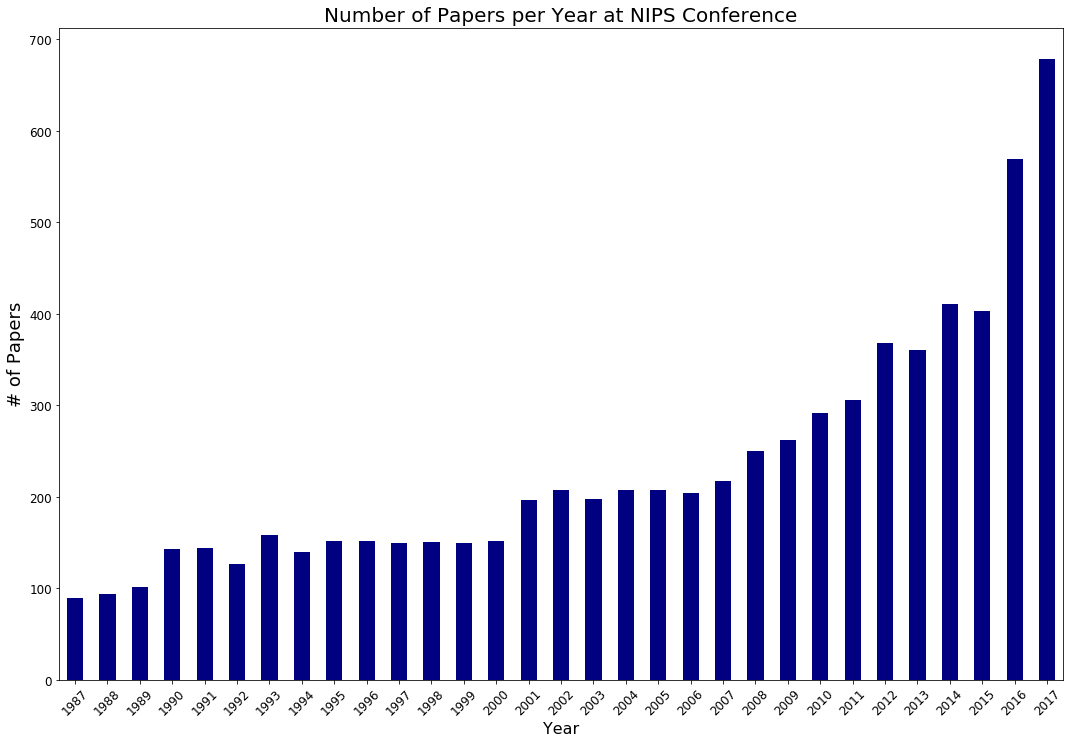

In [21]:
# Group the papers by year
groups = papers.groupby(['year'])

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
ax = counts.plot(kind='bar', figsize=(18,12), rot=45, fontsize=12, colormap='jet')

ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# of Papers",fontsize=18)
ax.set_title("Number of Papers per Year at NIPS Conference", fontsize=20)
plt.savefig('images/papers_year_bar')

# savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)

In [22]:
# Load the regular expression library
import re
# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

#re.sub('[AEIOU]+', lambda m: m.group(0).lower(), 'SOME TEXT HERE')   re.sub('[A-Z]'

# Print the processed titles of the first rows 
papers['title_processed'][0:10]

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
5    using a neural net to instantiate a deformable...
6             plasticity-mediated competitive learning
7    iceg morphology classification using an analog...
8    real-time control of a tokamak plasma using ne...
9    pulsestream synapses with non-volatile analogu...
Name: title_processed, dtype: object

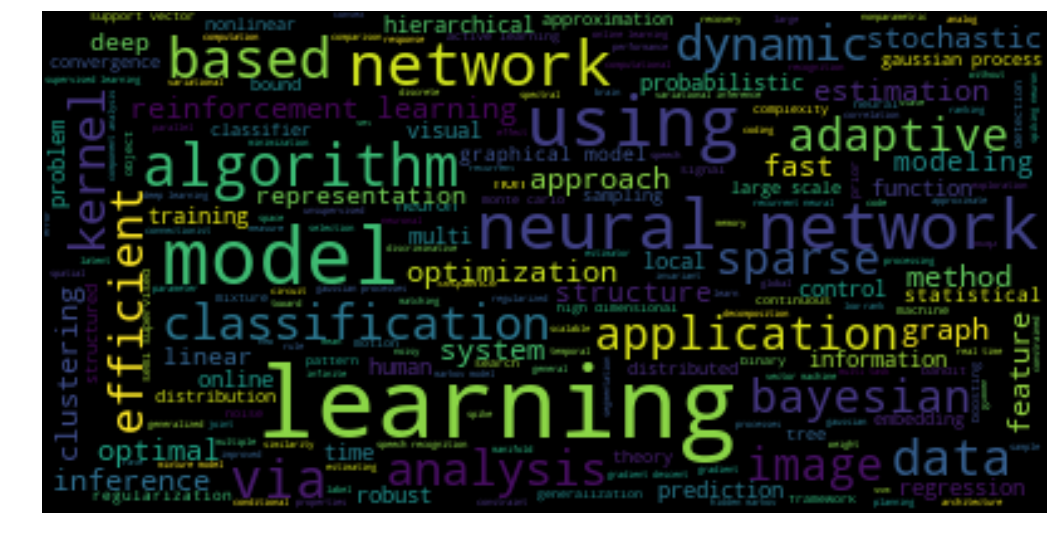

In [32]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(papers.title_processed)

# Create a WordCloud object
wordcloud = WordCloud()

# # Generate a word cloud
#wordcloud.generate(long_string)

# # Visualize the word cloud
# wordcloud.to_image()

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(long_string)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('images/word_cloud_titles')
#wordcloud.to_file("images/word_cloud_titles")
plt.show()